In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('/content/bmi.csv')
print(df.head())
df.info()

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0
Index,500.0,3.748,1.355053,0.0,3.0,4.0,5.0,5.0


In [9]:
df.columns.tolist()

['Gender', 'Height', 'Weight', 'Index']

In [10]:
x = df.iloc[:,:-1]

In [11]:
df.isnull()


,Gender,Height,Weight,Index
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False


In [12]:
from sklearn.impute import SimpleImputer

In [13]:
!pip install scikit-learn


In [14]:
# Separate features (X) and target (y)
X = df.drop('Index', axis=1)
y = df['Index']

print("Features (X) head:")
display(X.head())
print("Target (y) head:")
display(y.head())

Features (X) head:


,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


Target (y) head:


,Index
0,4
1,2
2,4
3,3
4,3


In [15]:
# Perform one-hot encoding on the 'Gender' column
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

print("Encoded Features (X_encoded) head:")
display(X_encoded.head())

Encoded Features (X_encoded) head:


,Height,Weight,Gender_Male
0,174,96,True
1,189,87,True
2,185,110,False
3,195,104,False
4,149,61,True


In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 3)
X_test shape: (100, 3)
y_train shape: (400,)
y_test shape: (100,)


In [17]:
# Implement MinMaxScaler (Normalization)
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Convert scaled data back to DataFrame for better viewing (optional)
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns=X_test.columns)

print("MinMaxScaler (Normalization) - X_train_minmax head:")
display(X_train_minmax_df.head())

MinMaxScaler (Normalization) - X_train_minmax head:


,Height,Weight,Gender_Male
0,0.322034,0.945455,1.0
1,0.457627,0.936364,0.0
2,0.644068,0.609091,1.0
3,0.457627,0.263636,0.0
4,0.118644,0.381818,1.0


In [18]:
# Implement StandardScaler (Standardization)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Convert scaled data back to DataFrame for better viewing (optional)
X_train_standard_df = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test_standard_df = pd.DataFrame(X_test_standard, columns=X_test.columns)

print("StandardScaler (Standardization) - X_train_standard head:")
display(X_train_standard_df.head())

StandardScaler (Standardization) - X_train_standard head:


,Height,Weight,Gender_Male
0,-0.630127,1.494960,1.051315
1,-0.141656,1.464166,-0.951190
2,0.529990,0.355591,1.051315
3,-0.141656,-0.814572,-0.951190
4,-1.362832,-0.414253,1.051315


In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

NameError: name 'model' is not defined


--- Analysis for column: Height ---


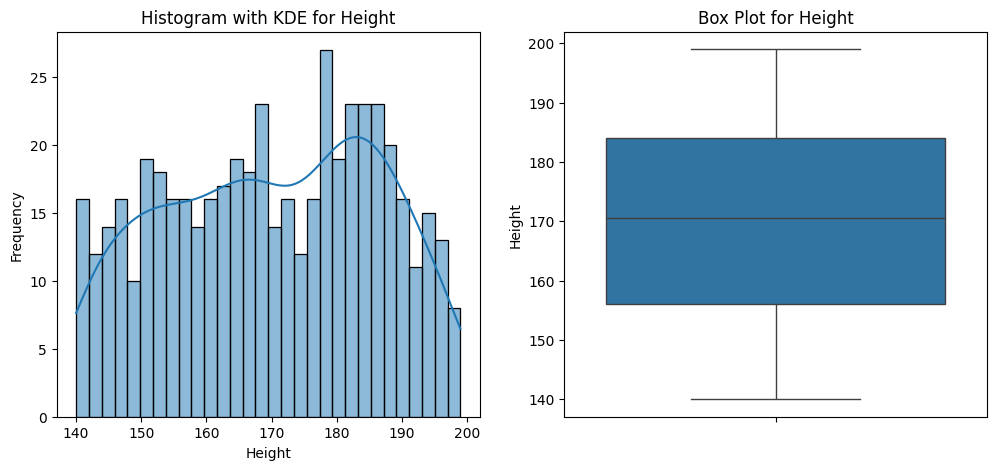

Skewness for Height: -0.1219
No significant outliers detected in Height using 1.5*IQR rule.

--- Analysis for column: Weight ---


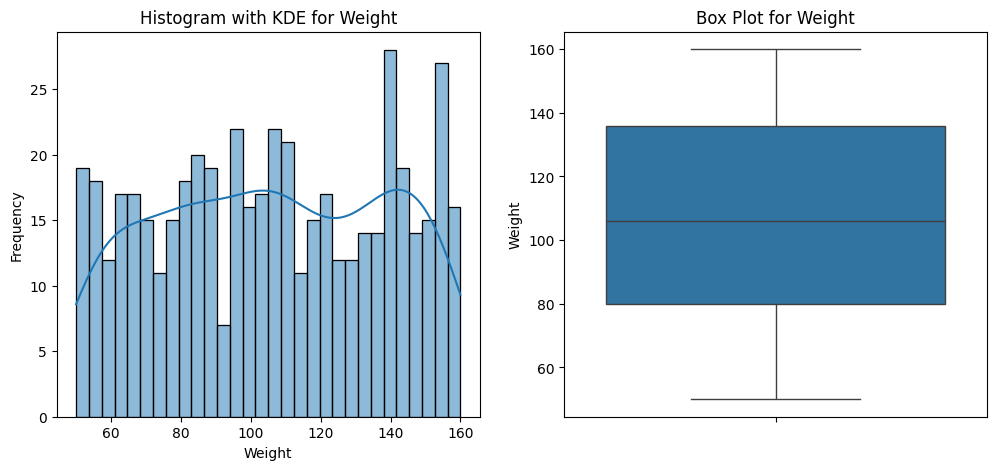

Skewness for Weight: -0.0377
No significant outliers detected in Weight using 1.5*IQR rule.

--- Analysis for column: Index ---


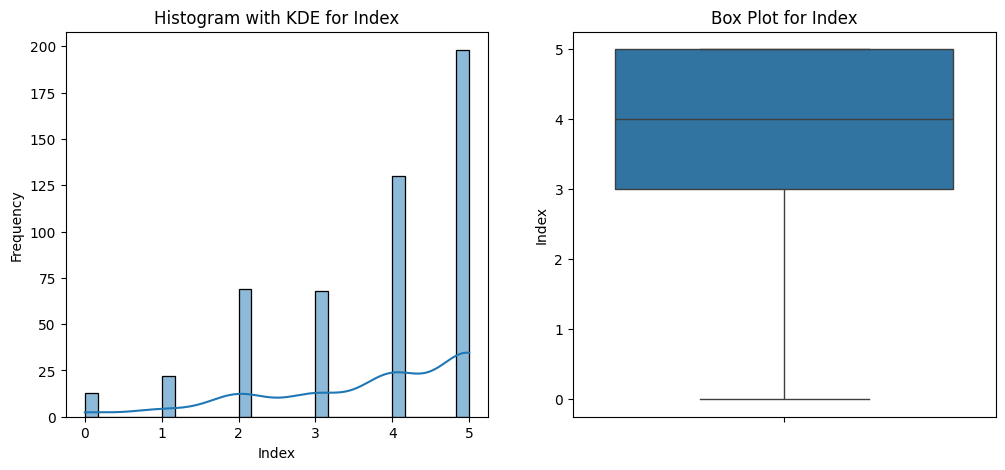

Skewness for Index: -0.9278
No significant outliers detected in Index using 1.5*IQR rule.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(f"\n--- Analysis for column: {col} ---")

    # Plot Histogram with KDE
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

    # Calculate skewness
    skewness_val = df[col].skew()
    print(f"Skewness for {col}: {skewness_val:.4f}")

    # Identify outliers visually (explained in speak)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Potential outliers in {col} (values outside 1.5*IQR):")
        print(outliers.values)
    else:
        print(f"No significant outliers detected in {col} using 1.5*IQR rule.")